# How does Price Change Across Different Areas over the Year

In [80]:
# library imports
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns;
from scipy.stats import pointbiserialr
%matplotlib inline

In [2]:
# Read in prepared dataset
df = pd.read_csv("../Data/DataPrepQ1.csv", low_memory=False)

In [3]:
# See info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21419 non-null  int64  
 1   neighbourhood           16884 non-null  object 
 2   neighbourhood_cleansed  21419 non-null  object 
 3   smart_location          21419 non-null  object 
 4   property_type           21419 non-null  object 
 5   room_type               21419 non-null  object 
 6   Side                    21419 non-null  object 
 7   Jan                     21389 non-null  float64
 8   Feb                     21391 non-null  float64
 9   Mar                     21391 non-null  float64
 10  Apr                     21406 non-null  float64
 11  May                     21369 non-null  float64
 12  Jun                     21369 non-null  float64
 13  Jul                     21377 non-null  float64
 14  Aug                     21373 non-null

In [4]:
# View property distribution
df.property_type.value_counts(normalize=True)

Apartment                 0.636117
House                     0.066763
Serviced apartment        0.066203
Boutique hotel            0.048695
Townhouse                 0.029180
Bed and breakfast         0.026378
Aparthotel                0.025118
Hotel                     0.024044
Condominium               0.023624
Loft                      0.017274
Villa                     0.012279
Hostel                    0.006209
Other                     0.003362
Casa particular (Cuba)    0.002615
Tiny house                0.002381
Guesthouse                0.002054
Guest suite               0.001447
Farm stay                 0.000700
Yurt                      0.000700
Earth house               0.000700
Cottage                   0.000560
Boat                      0.000514
Castle                    0.000420
Treehouse                 0.000327
Camper/RV                 0.000280
Chalet                    0.000280
Bungalow                  0.000233
Pension (South Korea)     0.000233
Nature lodge        

In [5]:
# Keep top 8 property types approx. 92% of all listings
prop_types = df.property_type.value_counts(normalize=True)[:8].index.tolist()
df = df.loc[df.property_type.isin(prop_types),:]

In [6]:
# where property type == serviced apartment change to apartment
df.property_type = df.property_type.apply(lambda x: 'Apartment' if x == 'Serviced apartment' else x)

In [7]:
# Find average price of each listing
df['avg_price'] = df.loc[:,'Jan':].mean(axis=1)

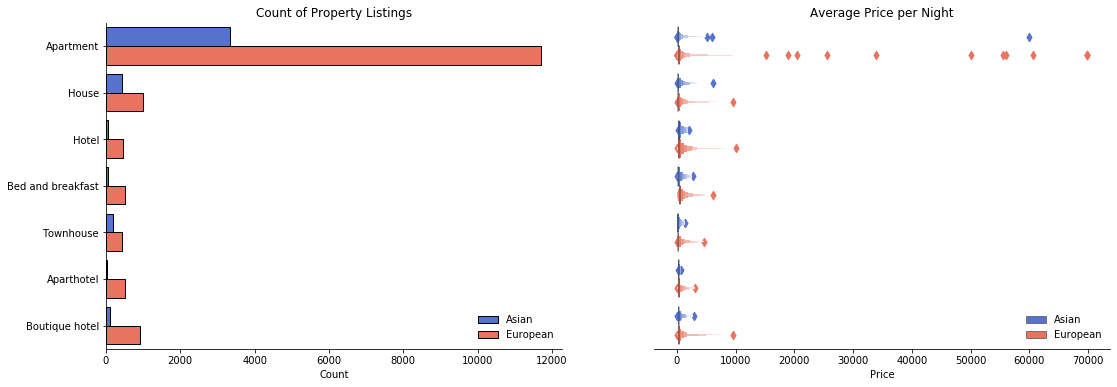

In [8]:
# plot sides and properties
f, ax = plt.subplots(figsize=(18,6), ncols=2)
ax0 = sns.countplot(y=df.property_type, hue=df.Side, edgecolor='k', palette=['royalblue', 'tomato'], ax=ax[0]);
ax0.set_title("Count of Property Listings")
ax0.set_xlabel("Count")
ax0.set_ylabel("")
ax0.legend(frameon=False)

ax1 = sns.boxenplot(x=df.avg_price, y=df.property_type, hue=df.Side, ax=ax[1], palette=['royalblue', 'tomato'], scale='area')
ax1.legend(frameon=False, loc='lower right')
ax1.set_title('Average Price per Night')
ax1.set_xlabel("Price")
ax1.set_yticks([])
ax1.set_ylabel("")
sns.despine(ax=ax[0]);
sns.despine(ax=ax[1], left=True);
plt.savefig("../Static/q1_countplot_1.png")

In [9]:
# Create feature showing difference between max and min prices for listings
df['max_min_diff_price'] = df.loc[:, 'Jan':'Dec'].max(axis=1) - df.loc[:, 'Jan':'Dec'].min(axis=1)
df['std_price'] = df.loc[:, 'Jan':'Dec'].std(axis=1)

In [10]:
# Get outlier listings
outlier_df = df.loc[df.std_price > 48].copy()

In [11]:
# where std price > 10000 change to more realistic price 8775 == 757 and 13066 == 30315
df.loc[8775, 'Jan':'Dec'] = 757.
df.loc[13066, 'Jan':'Dec'] = 30315.

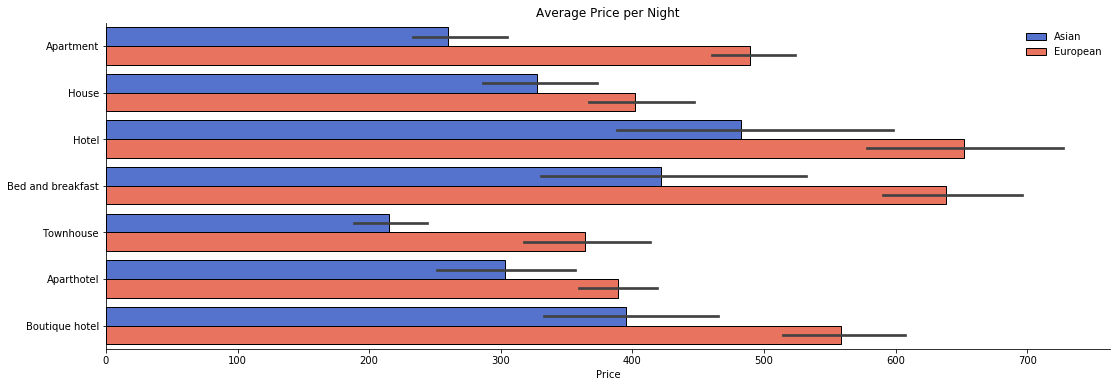

In [12]:
# plot the average price for property types
plt.figure(figsize=(18,6))
sns.barplot(df.avg_price, y=df.property_type, hue=df.Side, edgecolor='k', palette=['royalblue', 'tomato']);
plt.legend(frameon=False);
plt.title("Average Price per Night");
plt.xlabel("Price");
plt.ylabel("");
sns.despine();
plt.savefig("../Static/q1_barplot_1.png");

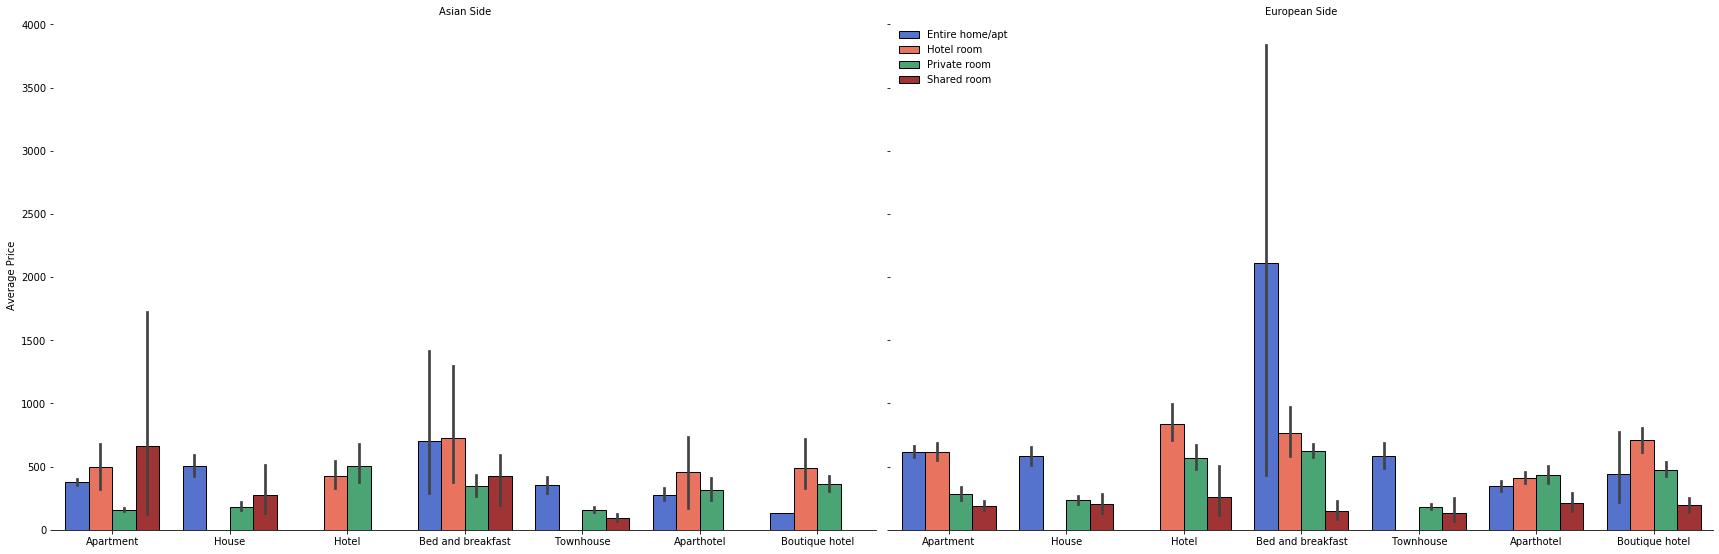

In [13]:
# plot the average price for property and room types
g = sns.catplot(y='avg_price', x='property_type', col='Side', hue='room_type', data=df, kind='bar', col_wrap=2, aspect=1.5, height=8, edgecolor='k', legend=False,
               palette=['royalblue', 'tomato', 'mediumseagreen', 'firebrick']);
(g.set_axis_labels("", "Average Price").set_titles("{col_name} {col_var}").despine(left=True));
plt.legend(frameon=False, loc='upper left')
plt.savefig("../Static/q1_catplot_1.png")

In [14]:
# neighbourhood property listings count
df.groupby('neighbourhood_cleansed').id.nunique().sort_values(ascending=False)

neighbourhood_cleansed
Beyoglu          5698
Sisli            2765
Fatih            2679
Kadikoy          1918
Besiktas         1443
Uskudar           675
Kagithane         540
Esenyurt          483
Atasehir          380
Maltepe           296
Bakirkoy          258
Sariyer           247
Bahcelievler      195
Kartal            176
Eyup              175
Basaksehir        172
Pendik            168
Kucukcekmece      157
Umraniye          150
Avcilar           138
Adalar            117
Bagcilar          103
Sile               88
Beylikduzu         85
Zeytinburnu        84
Tuzla              72
Beykoz             71
Gaziosmanpasa      65
Buyukcekmece       62
Gungoren           58
Arnavutkoy         45
Cekmekoy           41
Sancaktepe         39
Silivri            26
Bayrampasa         24
Esenler            21
Sultanbeyli        20
Sultangazi         19
Catalca             6
Name: id, dtype: int64

In [15]:
# compare most popular european and asian neighbourhoods
asia_euro_df = df.loc[df.neighbourhood_cleansed.isin(['Kadikoy', 'Beyoglu'])].copy()

In [16]:
asia_euro_df[asia_euro_df.avg_price == asia_euro_df.avg_price.min()]

,id,neighbourhood,neighbourhood_cleansed,smart_location,property_type,room_type,Side,Jan,Feb,Mar,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,avg_price,max_min_diff_price,std_price
19170,41759740,Taksim,Beyoglu,"Beyoğlu, Turkey",House,Private room,European,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.416667,5.0,1.443376


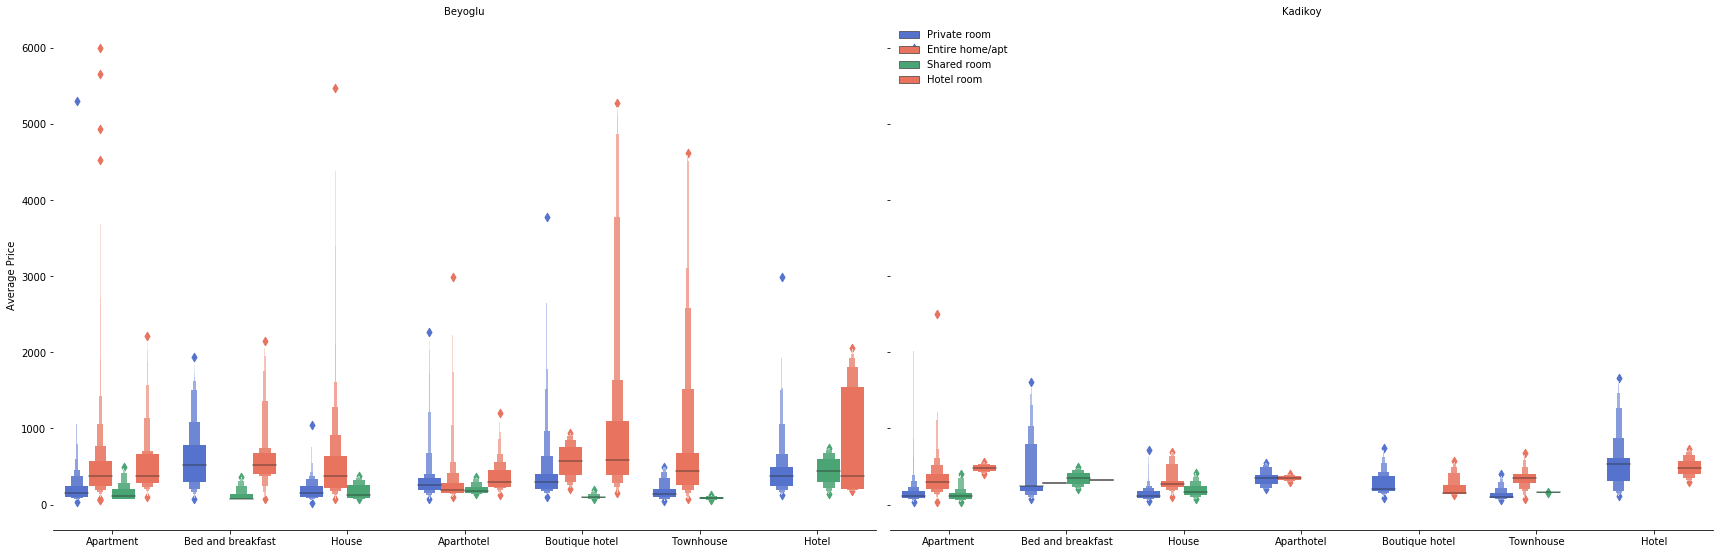

In [24]:
g = sns.catplot(y='avg_price', x='property_type', hue='room_type', col='neighbourhood_cleansed', data=asia_euro_df.loc[asia_euro_df.avg_price <= 6000], kind='boxen', aspect=1.5, height=8, legend=False,
               palette=['royalblue', 'tomato', 'mediumseagreen', 'tomato']);
(g.set_axis_labels("", "Average Price").set_titles("{col_name}").despine(left=True));
plt.legend(frameon=False, loc='upper left');
plt.savefig("../Static/q1_catplot_2.png")

In [22]:
# get correlation between price and side
pointbiserialr(df.Side.factorize()[0], df.avg_price)

PointbiserialrResult(correlation=0.060518345148844285, pvalue=1.678448195980868e-17)

In [23]:
pointbiserialr(asia_euro_df.Side.factorize()[0], asia_euro_df.avg_price)

PointbiserialrResult(correlation=-0.15612324609634454, pvalue=9.255036804886852e-43)

In [25]:
# Most expensive neighbourhood at different times of year
df_1 = df.groupby('neighbourhood_cleansed').mean().round(2).drop(['id'], axis=1).reset_index()

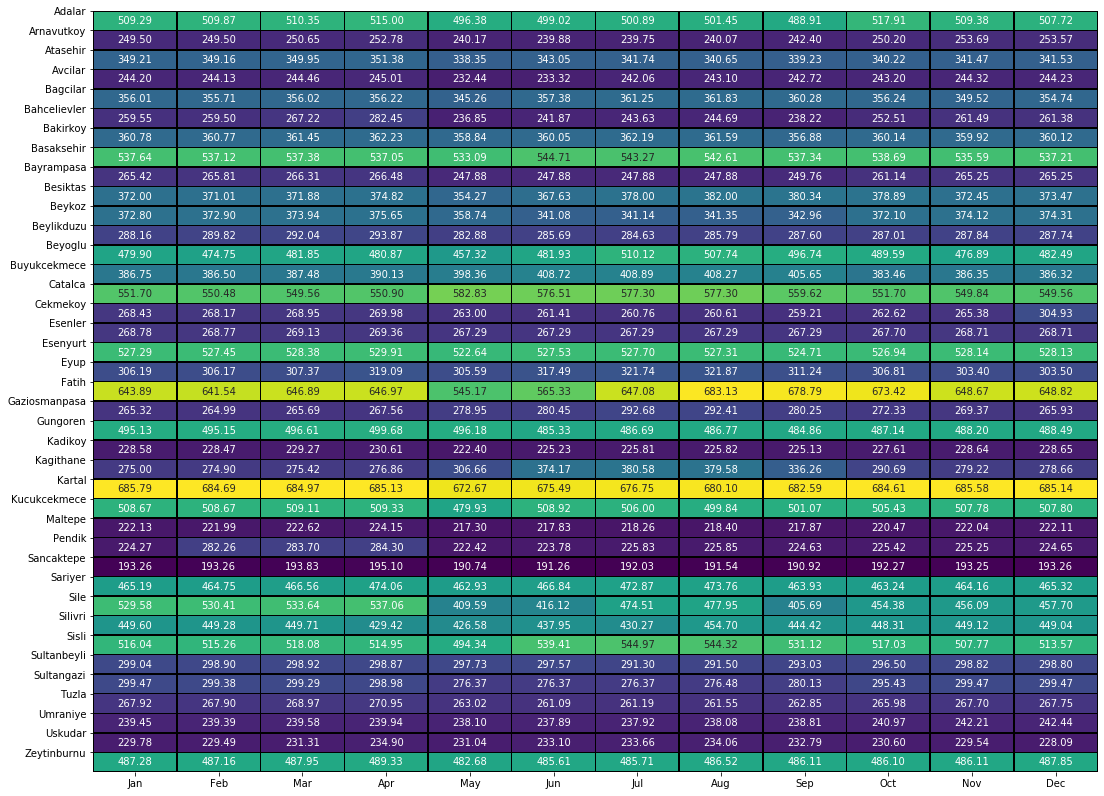

In [41]:
# plot the average price per neighbourhood across the year
plt.figure(figsize=(18,14))
sns.heatmap(df_1.loc[:,'Jan':'Dec'], annot=True, linewidth=.5, cbar=False, cmap='viridis', fmt=".2f", linecolor='k');
plt.yticks(np.arange(39), df_1.neighbourhood_cleansed.values.tolist(), rotation=360);
plt.savefig("../Static/q2_heatmap_1.png")

In [31]:
asian_hoods = df.loc[df.Side == 'Asian', 'neighbourhood_cleansed'].unique().tolist()
euro_hoods = [i for i in df.neighbourhood_cleansed.unique().tolist() if i not in asian_hoods]

In [35]:
asian_df_1 = df_1.loc[df_1.neighbourhood_cleansed.isin(asian_hoods)].copy()
euro_df_1 = df_1.loc[df_1.neighbourhood_cleansed.isin(euro_hoods)].copy()

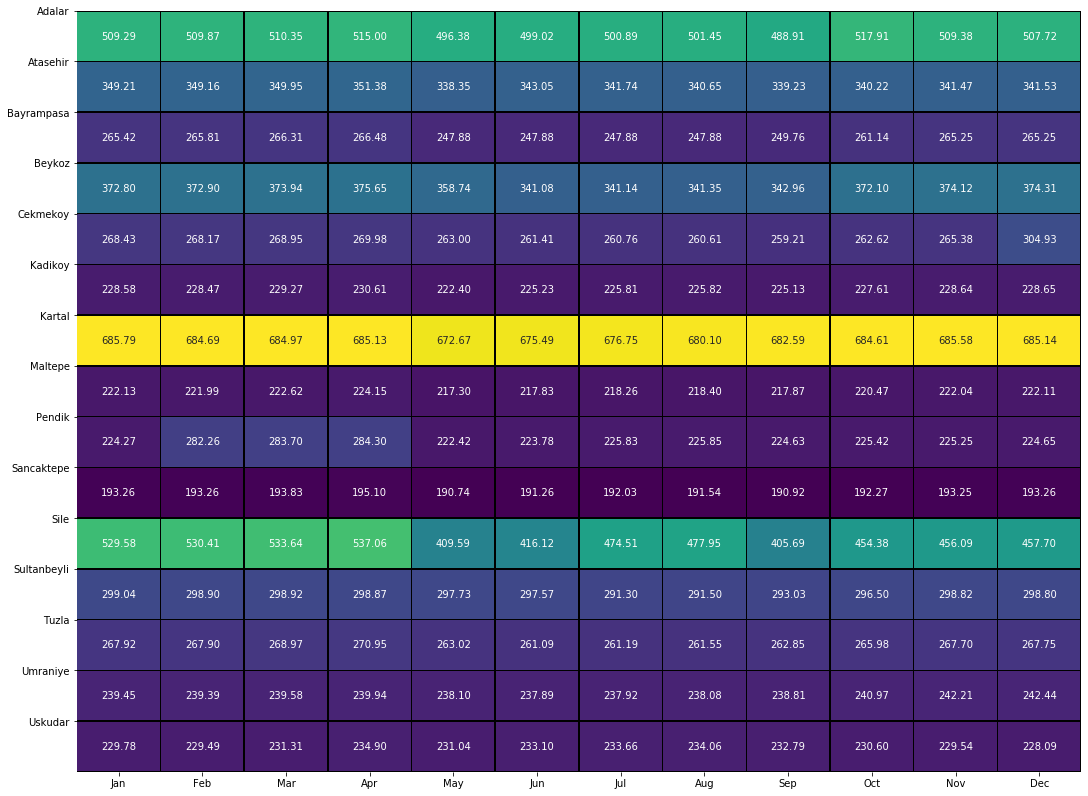

In [39]:
plt.figure(figsize=(18,14))
sns.heatmap(asian_df_1.loc[:,'Jan':'Dec'], annot=True, linewidth=.5, cbar=False, cmap='viridis', fmt=".2f", linecolor='k');
plt.yticks(np.arange(len(asian_hoods)), asian_df_1.neighbourhood_cleansed.values.tolist(), rotation=360);
plt.savefig("../Static/q2_heatmap_2.png")

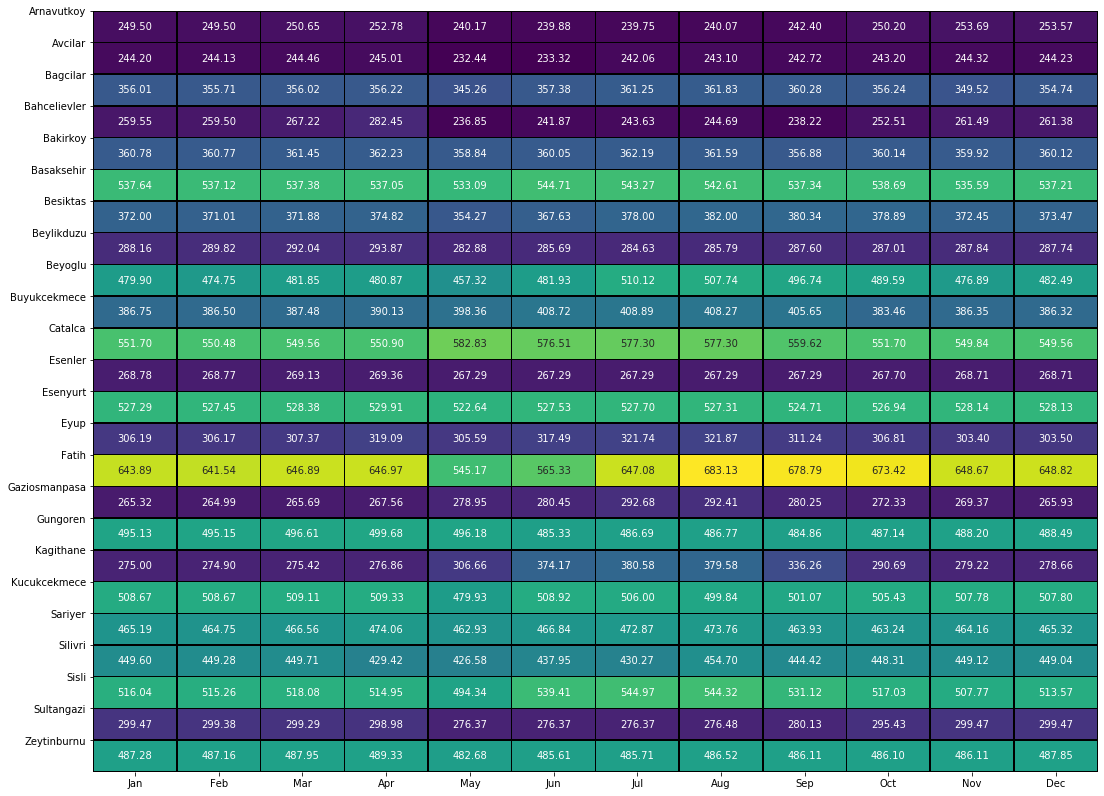

In [42]:
plt.figure(figsize=(18,14))
sns.heatmap(euro_df_1.loc[:,'Jan':'Dec'], annot=True, linewidth=.5, cbar=False, cmap='viridis', fmt=".2f", linecolor='k');
plt.yticks(np.arange(len(euro_hoods)), euro_df_1.neighbourhood_cleansed.values.tolist(), rotation=360);
plt.savefig("../Static/q2_heatmap_3.png")

In [43]:
# create new variable which is a copy of Dec column so that it can be used to get the average price change of Jan
df_2 = df_1.copy()
df_2['_Dec'] = df_2.Dec

In [44]:
# Change ordering of columns
cols = df_2.loc[:, 'Jan':'_Dec'].columns.tolist()
cols = cols[-1:] + cols[:-1]
df_2 = df_2[cols]

In [45]:
# Structure dataset to show price changes
df_2 = df_2.diff(axis=1)
df_2.drop(['_Dec'], axis=1, inplace=True)
df_2['neighbourhood_cleansed'] = df_1.neighbourhood_cleansed
cols = df_2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_2 = df_2[cols]

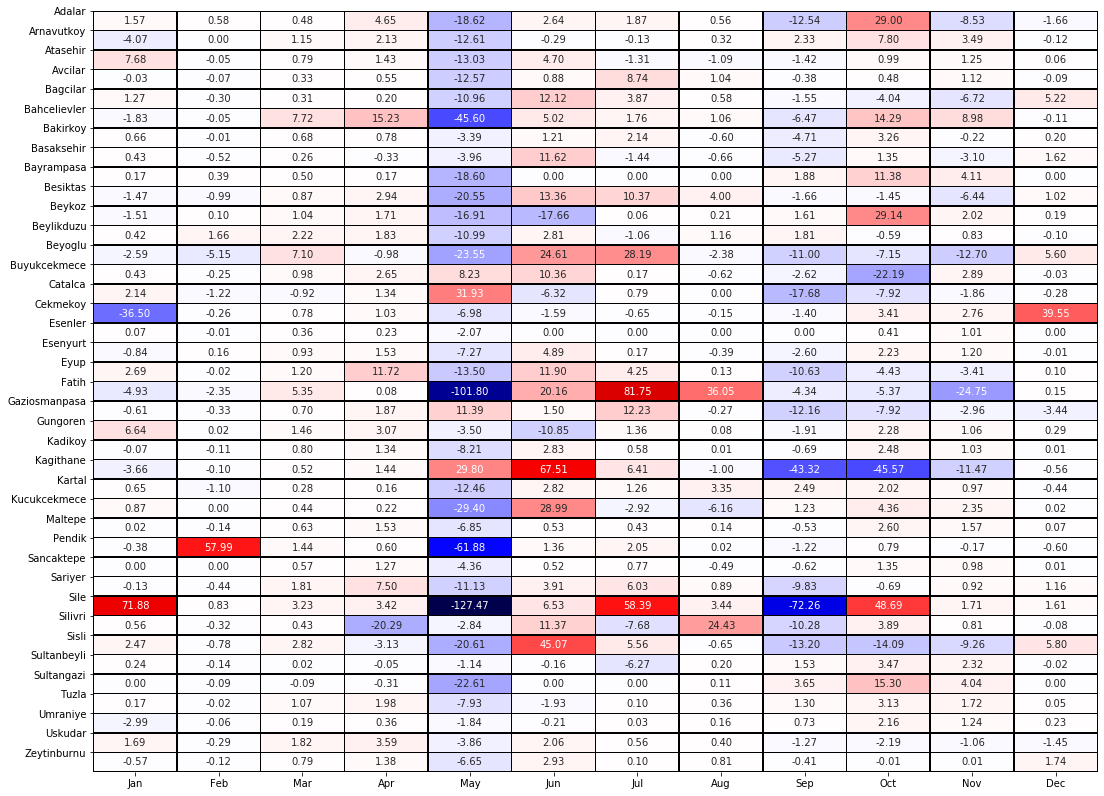

In [48]:
# plot the average change in price
plt.figure(figsize=(18,14))
sns.heatmap(df_2.loc[:,'Jan':'Dec'], annot=True, linewidth=.5, cbar=False, center=0, cmap='seismic', fmt=".2f", linecolor='k');
plt.yticks(np.arange(39), df_2.neighbourhood_cleansed.values.tolist(), rotation=360);
plt.savefig("../Static/q2_heatmap_4.png")

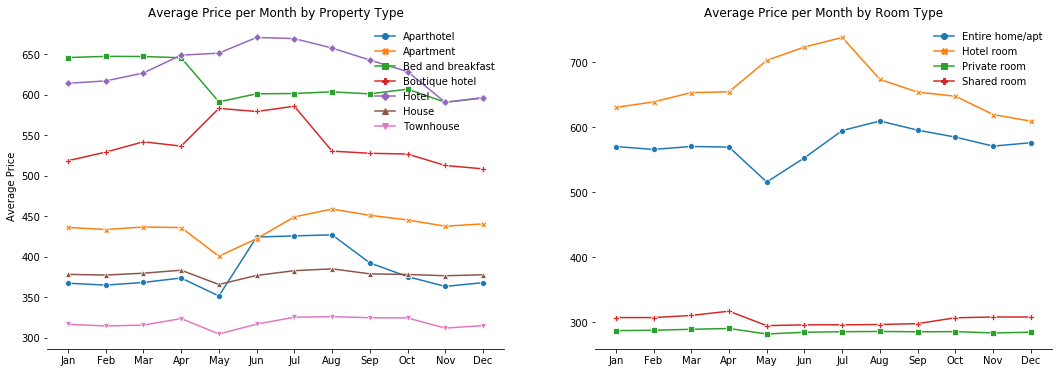

In [77]:
# plot price change based on property type and room type
df_3 = df.groupby('property_type').mean().round(2).drop(['id'], axis=1)
df_4 = df.groupby('room_type').mean().round(2).drop(['id'], axis=1)
f, ax = plt.subplots(figsize=(18,6), ncols=2)
ax0 = sns.lineplot(data=df_3.loc[:,'Jan':'Dec'].T, dashes=False, markers=True, sort=False, ax=ax[0]);
ax0.legend(frameon=False, loc='best')
ax0.set_title("Average Price per Month by Property Type")
ax0.set_ylabel("Average Price")
ax1 = sns.lineplot(data=df_4.loc[:,'Jan':'Dec'].T, dashes=False, markers=True, sort=False, ax=ax[1])
ax1.set_title("Average Price per Month by Room Type")
ax1.legend(frameon=False, loc='best')
sns.despine(left=True);
plt.savefig("../Static/q2_lineplot_1.png")

In [55]:
# Look into kucukcekmece
df_5 = df.loc[df.neighbourhood_cleansed == 'Kucukcekmece', :].copy()

In [56]:
df_5

,id,neighbourhood,neighbourhood_cleansed,smart_location,property_type,room_type,Side,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
757,2048291,NaN,Kucukcekmece,"Istanbul, Turkey",Apartment,Private room,European,113.0,113.0,113.0,113.000000,113.0,113.0,113.0,113.0,113.0,113.000000,113.0,113.0
863,2458860,NaN,Kucukcekmece,"Istanbul, Turkey",Apartment,Entire home/apt,European,447.0,447.0,447.0,447.000000,447.0,447.0,447.0,447.0,447.0,447.000000,447.0,447.0
1395,4042565,NaN,Kucukcekmece,"Istanbul, Turkey",Apartment,Private room,European,114.0,114.0,114.0,114.000000,114.0,114.0,114.0,114.0,114.0,114.000000,114.0,114.0
1768,5147138,NaN,Kucukcekmece,"İstanbul, Turkey",Apartment,Entire home/apt,European,279.0,279.0,279.0,279.000000,279.0,279.0,279.0,279.0,279.0,279.000000,279.0,279.0
1769,5147139,NaN,Kucukcekmece,"İstanbul, Turkey",Apartment,Entire home/apt,European,265.0,265.0,265.0,265.000000,265.0,265.0,265.0,265.0,265.0,265.000000,265.0,265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20580,42674027,NaN,Kucukcekmece,"Küçükçekmece, Turkey",Hotel,Private room,European,1743.0,1743.0,1743.0,1743.000000,1743.0,1743.0,1743.0,1743.0,1743.0,1743.000000,1743.0,1743.0
20925,42873502,NaN,Kucukcekmece,"Küçükçekmece, Turkey",Apartment,Private room,European,119.0,119.0,119.0,119.000000,119.0,119.0,119.0,119.0,119.0,119.000000,119.0,119.0
21295,43109994,NaN,Kucukcekmece,"İstanbul, Turkey",Apartment,Private room,European,70.0,70.0,70.0,70.000000,70.0,70.0,70.0,70.0,70.0,70.000000,70.0,70.0
21346,43178609,NaN,Kucukcekmece,"İstanbul, Turkey",Apartment,Entire home/apt,European,400.0,400.0,400.0,398.333333,350.0,350.0,350.0,350.0,350.0,374.193548,400.0,400.0


In [57]:
df_5.groupby('property_type').mean().round(2)

,id,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
property_type,,,,,,,,,,,,,
Apartment,31769649.92,1159.37,1159.38,1159.72,1139.48,520.94,556.90,553.29,546.15,547.66,551.92,553.75,553.77
Bed and breakfast,37616970.00,453.86,453.86,453.86,453.86,453.86,453.86,453.86,453.86,453.86,453.86,453.86,453.86
Boutique hotel,35223392.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00
Hotel,37697904.33,720.46,720.52,723.47,729.39,696.00,696.00,696.00,696.00,696.00,707.88,720.44,720.57
House,35506773.61,246.37,246.36,247.37,248.97,233.56,238.65,238.09,233.56,233.83,240.48,246.35,246.35
Townhouse,38851279.00,249.75,249.75,249.75,249.75,249.75,249.75,249.75,249.75,249.75,249.75,249.75,249.75


In [58]:
df_5.loc[(df_5.property_type == 'Apartment'),:].sort_values(by='Apr', ascending=False).head(1)

,id,neighbourhood,neighbourhood_cleansed,smart_location,property_type,room_type,Side,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
8775,30361326,NaN,Kucukcekmece,"İstanbul, Turkey",Apartment,Private room,European,75716.0,75716.0,75716.0,73217.366667,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0


In [59]:
df.loc[df.id == 30361326, ['Jan', 'Feb', 'Mar', 'Apr']] = (df.loc[df.id == 30361326, ['Jan', 'Feb', 'Mar', 'Apr']]
                                                          .apply(lambda x: x/100.))

In [60]:
df.loc[df.id == 30361326, ['Jan', 'Feb', 'Mar', 'Apr']]

,Jan,Feb,Mar,Apr
8775,757.16,757.16,757.16,732.173667
